In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from src.util import *

In [2]:
TKR = 'T'
MAX_HOLDING = 100
TRAIN_DATE = pd.Timestamp('2022-01-01')
TIME_EFFECT = 3

historic_prices = yf.download(TKR)['Adj Close']
training_prices = historic_prices[:TRAIN_DATE]
testing_prices = historic_prices[TRAIN_DATE:]

[*********************100%%**********************]  1 of 1 completed


In [7]:
confidences = []
for pos1 in range(len(training_prices) - MAX_HOLDING):
    ans = 0
    for pos2 in range(1, MAX_HOLDING):
        ans += (training_prices.iloc[pos1 + pos2] - training_prices.iloc[pos1]) * time_effect[TIME_EFFECT](MAX_HOLDING, pos2)
    confidences.append(ans)
normalized_confidences = normalize_average(confidences, MAX_HOLDING)

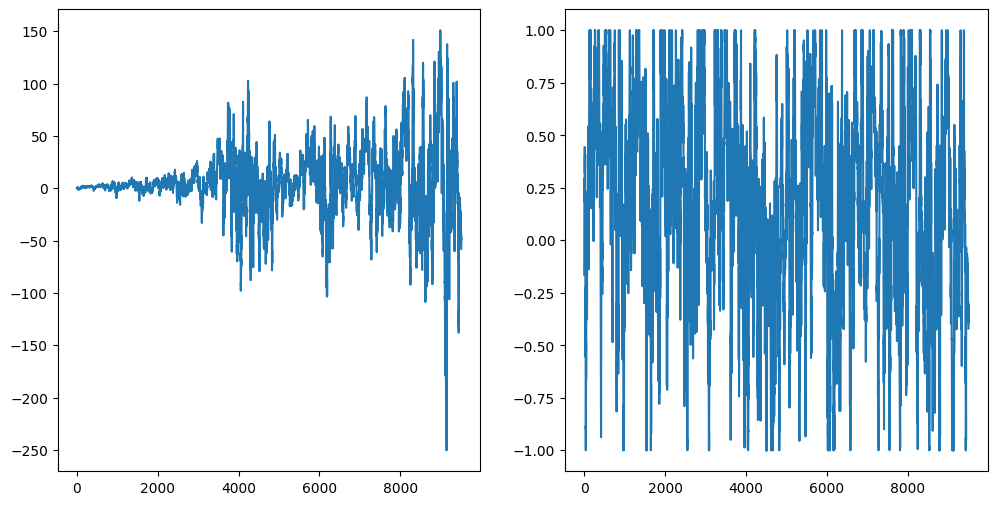

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(range(len(confidences)), confidences)
ax2.plot(range(len(normalized_confidences)), normalized_confidences)

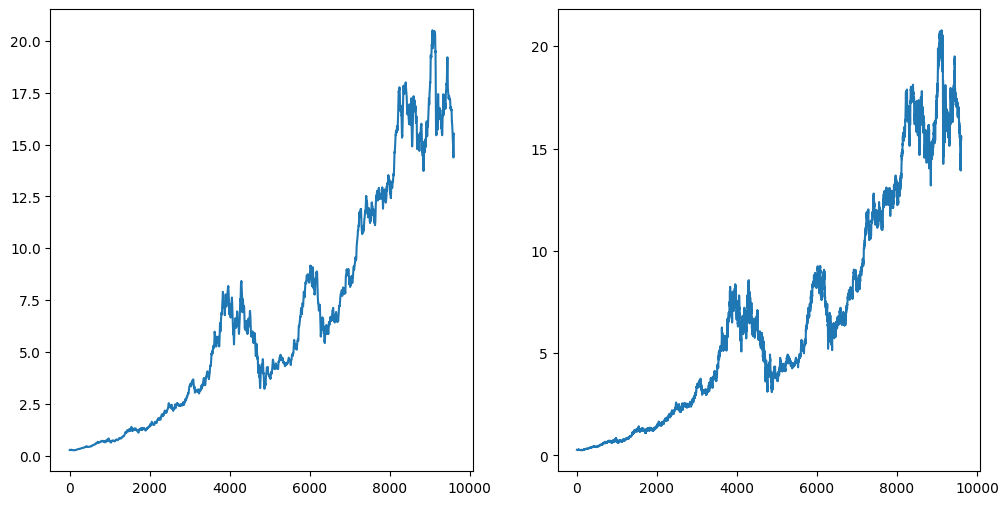

In [10]:
gaussian_blurred_prices = gaussian_blur(training_prices, 3)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(range(len(gaussian_blurred_prices)), gaussian_blurred_prices)
ax2.plot(range(len(training_prices)), training_prices)

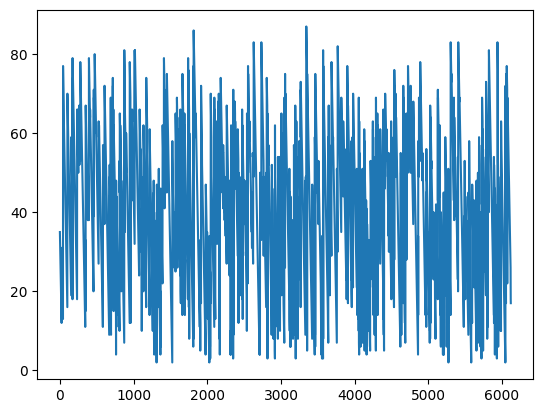

In [19]:
sell_time = []
for day in range(len(training_prices) - MAX_HOLDING):
    if normalized_confidences[day] > 0:
        highest = 0
        highest_pos = 0
        for delay in range(MAX_HOLDING):
            delta = abs((training_prices.iloc[day + delay] - training_prices.iloc[day])) * time_effect[TIME_EFFECT](MAX_HOLDING, delay)
            if delta > highest:
                highest = delta
                highest_pos = delay
        sell_time.append(highest_pos)

plt.plot(range(len(sell_time)), sell_time)
plt.show()
        